In [ ]:
# This program uses the dual moving avergage crossover strategy to generate buy and sell signals 

In [ ]:
import numpy as np 
import pandas as pd 
from datetime import datetime 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [ ]:
#importing relevant libraries 
import pandas as pd
import numpy as np
from datetime import datetime
import  matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [ ]:
#Uploading data 
from google.colab import files 
uploaded = files.upload()

Saving AAPLnewnew.csv to AAPLnewnew.csv


In [ ]:
#Store the data in a variable

AAPL = pd.read_csv('AAPLnewnew.csv')

#present the data 

AAPL


,Date,Price,Open,High,Low,Vol.,Change %
0,3-Jan-11,11.77,11.63,11.79,11.60,445.12M,2.17%
1,4-Jan-11,11.83,11.87,11.87,11.72,309.35M,0.51%
2,5-Jan-11,11.93,11.77,11.94,11.77,255.52M,0.85%
3,6-Jan-11,11.92,11.95,11.97,11.89,300.43M,-0.08%
4,7-Jan-11,12.00,11.93,12.01,11.85,311.93M,0.67%
...,...,...,...,...,...,...,...
2865,23-May-22,143.11,137.79,143.26,137.65,116.07M,4.01%
2866,24-May-22,140.36,140.80,141.97,137.33,103.55M,-1.92%
2867,25-May-22,140.52,138.43,141.79,138.34,91.84M,0.11%
2868,26-May-22,143.78,137.39,144.34,137.14,90.35M,2.32%


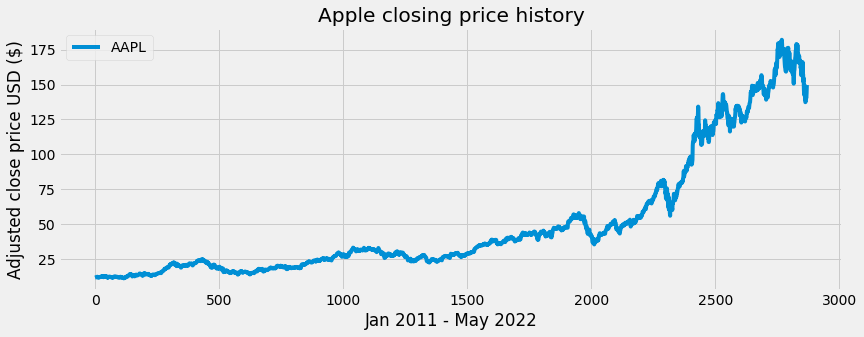

In [ ]:
#Charting the data 
plt.figure(figsize=(12.5,4.5))
plt.plot(AAPL['Price'], label = 'AAPL')
plt.title('Apple closing price history')
plt.xlabel('Jan 2011 - May 2022')
plt.ylabel('Adjusted close price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#Setting up the technical indicators 
#Setting up the 30 day Simple Moving Average 
SMA30 = pd.DataFrame()
SMA30['Price'] = AAPL['Price'].rolling(window=18).mean()
SMA30

,Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2865,150.843889
2866,149.550556
2867,148.598889
2868,147.811111


In [ ]:
#Setting up the 150 day Simple Moving Average
SMA150 = pd.DataFrame()
SMA150['Price'] = AAPL['Price'].rolling(window=200).mean()
SMA150

,Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2865,159.56070
2866,159.53205
2867,159.50665
2868,159.49625


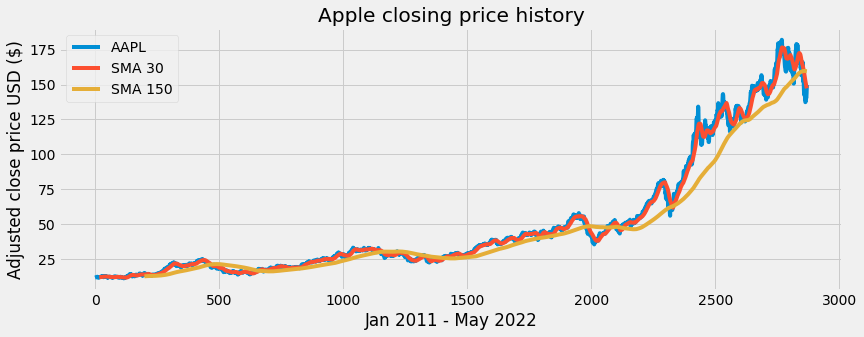

In [ ]:
#Charting the data with the moving averages 
plt.figure(figsize=(12.5,4.5))
plt.plot(AAPL['Price'], label = 'AAPL')
plt.plot(SMA30['Price'], label = 'SMA 30')
plt.plot(SMA150['Price'], label = 'SMA 150')
plt.title('Apple closing price history')
plt.xlabel('Jan 2011 - May 2022')
plt.ylabel('Adjusted close price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#Storing only the relevant data in a new data frame 
data = pd.DataFrame()
data['AAPL'] = AAPL['Price']
data['SMA30'] = SMA30['Price']
data['SMA150'] = SMA150['Price']
data

,AAPL,SMA30,SMA150
0,11.77,NaN,NaN
1,11.83,NaN,NaN
2,11.93,NaN,NaN
3,11.92,NaN,NaN
4,12.00,NaN,NaN
...,...,...,...
2865,143.11,150.843889,159.56070
2866,140.36,149.550556,159.53205
2867,140.52,148.598889,159.50665
2868,143.78,147.811111,159.49625


In [ ]:
#Trade Signal Generator function 
def buy_sell(data):
  SigPriceBuy = []
  SigPriceSell = []
  flag = -1

  for i in range(len(data)):
    if (data['SMA30'][i] > data['SMA150'][i]) and (data['SMA30'][i-1] < data['SMA150'][i-1]):
      if flag != 1:
        SigPriceBuy.append(data['AAPL'][i])
        SigPriceSell.append(np.nan)
        flag = 1
      else:
        SigPriceBuy.append(np.nan)
        SigPriceSell.append(np.nan)
    elif (data['SMA30'][i] < data['SMA150'][i]) and (data['SMA30'][i-1] > data['SMA150'][i-1]):
      if flag != 0:
        SigPriceBuy.append(np.nan)
        SigPriceSell.append(data['AAPL'][i])
        flag = 0
      else:
        SigPriceBuy.append(np.nan)
        SigPriceSell.append(np.nan)
    else:
      SigPriceBuy.append(np.nan)
      SigPriceSell.append(np.nan)

  return(SigPriceBuy, SigPriceSell)

In [ ]:
#Storing the trade signals into a variable 
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [ ]:
#Show data 
data 

,AAPL,SMA30,SMA150,Buy_Signal_Price,Sell_Signal_Price
0,11.77,NaN,NaN,NaN,NaN
1,11.83,NaN,NaN,NaN,NaN
2,11.93,NaN,NaN,NaN,NaN
3,11.92,NaN,NaN,NaN,NaN
4,12.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2865,143.11,150.843889,159.56070,NaN,NaN
2866,140.36,149.550556,159.53205,NaN,NaN
2867,140.52,148.598889,159.50665,NaN,NaN
2868,143.78,147.811111,159.49625,NaN,NaN


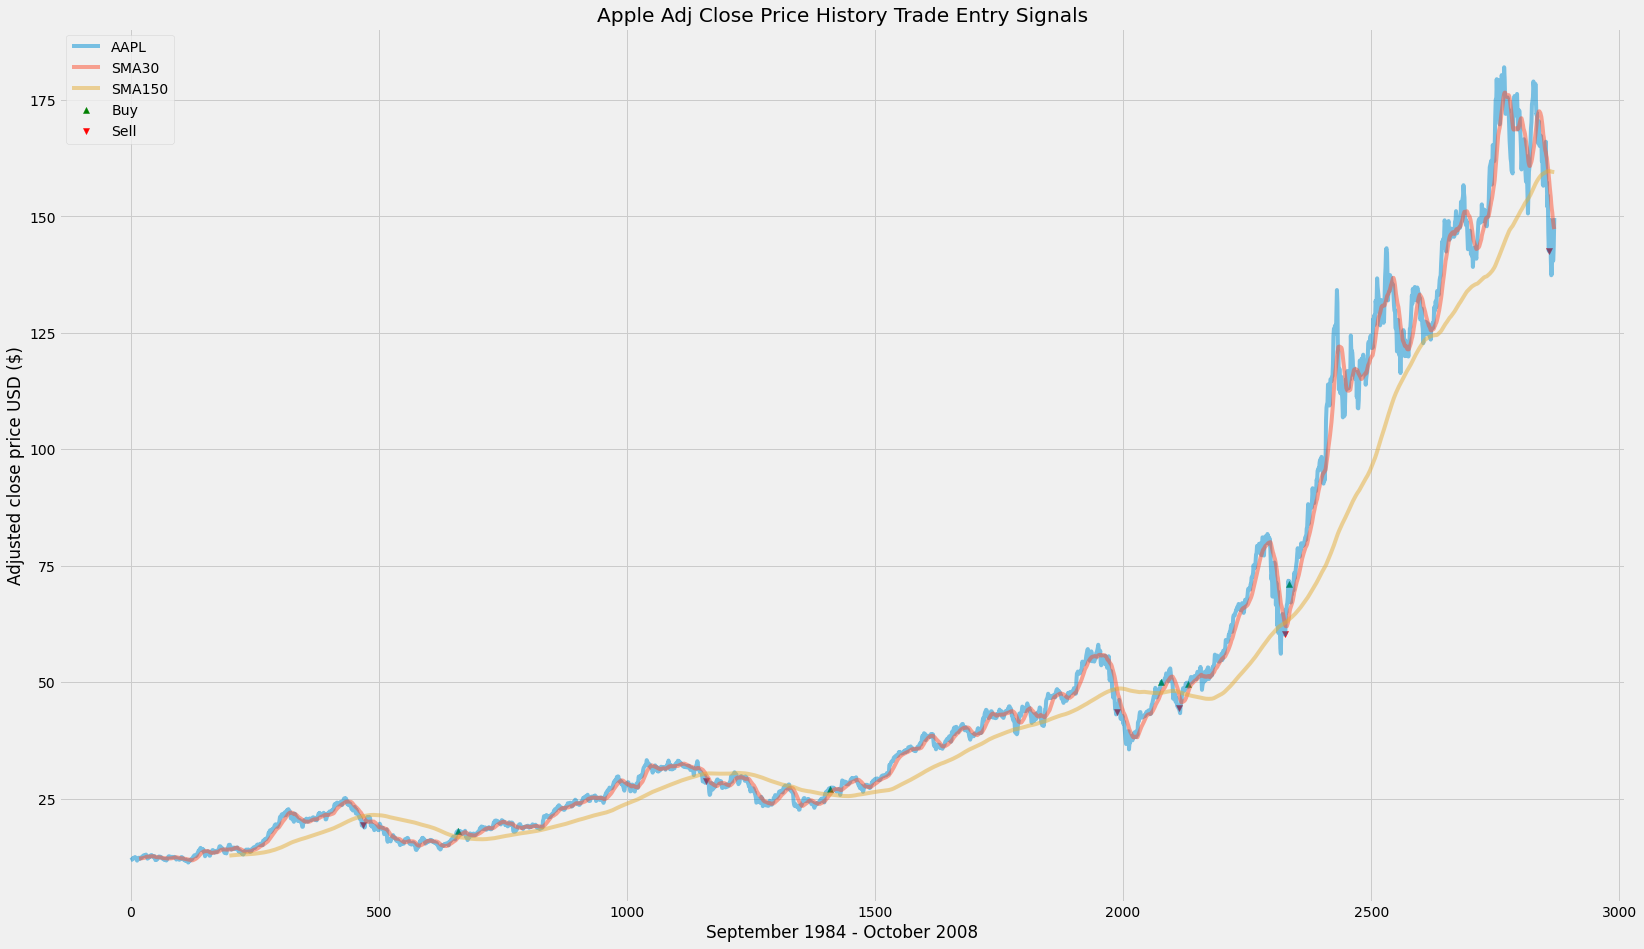

In [ ]:
#Charting the data and entry points 
plt.figure(figsize=(25, 15))
plt.plot(data['AAPL'], label = 'AAPL', alpha = 0.50)
plt.plot(data['SMA30'], label = 'SMA30', alpha = 0.50)
plt.plot(data['SMA150'], label = 'SMA150', alpha = 0.50)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.title('Apple Adj Close Price History Trade Entry Signals')
plt.xlabel('September 1984 - October 2008')
plt.ylabel('Adjusted close price USD ($)')
plt.legend(loc='upper left')
plt.show()
